<a href="https://colab.research.google.com/github/AshKate98/Breast-Cancer-Diagnostic-Data-Set/blob/main/FinalAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing of packages 

In [ ]:
import pandas as pd
import seaborn as sns
import plotly
import numpy as np
import matplotlib.pyplot as plt
print('cells successful')

cells successful


# Uploading CSV File

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin-data_data.csv to breast-cancer-wisconsin-data_data (1).csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['breast-cancer-wisconsin-data_data.csv']))

In [ ]:
#df shows the first and last 5 observations of the dataset
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#Columns in the Dataset 
33

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.shape

(569, 33)

#Seperating columns in order to determine correlation between features 
Mean
SE
Worst

In [ ]:
df_mean= list(df.columns[1:12])
print(df_mean)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [ ]:
df_se= list(df.columns[13:22])
print(df_se)

['texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']


In [ ]:
df_worst= list(df.columns[23:32])
print(df_worst)

['texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


# Potential DV or IV

In [ ]:
df['area_mean'].value_counts()

512.2     3
1214.0    2
399.8     2
758.6     2
1075.0    2
         ..
704.4     1
904.6     1
646.1     1
300.2     1
1001.0    1
Name: area_mean, Length: 539, dtype: int64

In [ ]:
df['texture_mean'].value_counts()

14.93    3
15.70    3
18.90    3
16.84    3
17.46    3
        ..
20.53    1
17.66    1
24.80    1
20.56    1
10.94    1
Name: texture_mean, Length: 479, dtype: int64

In [ ]:
df['smoothness_mean'].value_counts()

0.10070    5
0.10750    4
0.10540    4
0.11500    4
0.10890    3
          ..
0.07274    1
0.07948    1
0.07840    1
0.09780    1
0.07557    1
Name: smoothness_mean, Length: 474, dtype: int64

In [ ]:
df['radius_mean'].value_counts()

12.34    4
12.77    3
15.46    3
12.89    3
13.05    3
        ..
12.31    1
18.81    1
13.30    1
23.09    1
18.25    1
Name: radius_mean, Length: 456, dtype: int64

In [ ]:
df['perimeter_mean'].value_counts()

82.61     3
134.70    3
87.76     3
130.00    2
58.79     2
         ..
70.21     1
68.69     1
95.55     1
102.90    1
88.52     1
Name: perimeter_mean, Length: 522, dtype: int64

In [ ]:
df['compactness_mean'].value_counts()

0.12060    3
0.11470    3
0.04994    2
0.13390    2
0.12670    2
          ..
0.06698    1
0.11430    1
0.06095    1
0.31140    1
0.18750    1
Name: compactness_mean, Length: 537, dtype: int64

In [ ]:
df['concavity_mean'].value_counts()

0.00000    13
0.12040     3
0.01342     2
0.03344     2
0.02688     2
           ..
0.12010     1
0.13480     1
0.05940     1
0.01797     1
0.06593     1
Name: concavity_mean, Length: 537, dtype: int64

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#Missing Data

In [ ]:
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#Deletion of column 33


In [ ]:
df=df.drop(columns="Unnamed: 32")

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#Transformations

if the cancer diagnosis is labeled M for malignant return cancerous 

if the cancer diagosis is labeled B for maligant returrn non-cancerous


In [ ]:
def diagnosistransform(row) :
  if row['diagnosis'] == 'M' :
    return 'cancerous'
  elif row['diagnosis'] == 'B' :
      return 'noncancerous'
  elif row['diagnosis'] == 'unknown':
      return 'unknown'
  else:
    return 'unknown'

In [ ]:
df['diagnosis_mod'] = df.apply(diagnosistransform, 1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_mod
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,cancerous
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,cancerous
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,cancerous
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,cancerous
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,cancerous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,cancerous
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,cancerous
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,cancerous
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,cancerous


If diagnosis is labeled M return 1 

If diagnosis is labeled B return 2

If unknown return 0 

In [ ]:
def diagnosistransform2(row) :
  if row['diagnosis'] == 'M' :
    return '1'
  elif row['diagnosis'] == 'B' :
      return '2'
  elif row['diagnosis'] == 'unknown':
      return '0'
  else:
    return '0'

In [ ]:
df['diagnosis_mod'] = df.apply(diagnosistransform2, 1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_mod
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1


If the radius mean is over 17.85 return high risk for a noncanerous tumor most malignant tumors are 17.85 or above with radius mean

If radius mean is below 17.85 it is a good chance the diagnosis is noncancerous

In [ ]:
for idx, row in df.iterrows():
  if row['radius_mean'] >= 17.85:
    df.loc[idx, 'radius_mean_mod'] = 'High Risk'
  else:
    df.loc[idx, 'radius_mean_mod'] = 'Low Risk'

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_mean_mod
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,High Risk
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,High Risk
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,High Risk
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,Low Risk
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,High Risk
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,High Risk
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Low Risk
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,High Risk


In [ ]:
df=df.drop(columns="Unnamed: 32")

#Data types

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#Central Tendency and Distributions

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df_diagnosis = df.groupby(['diagnosis'])
df_diagnosis.mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [ ]:
df_diagnosis.describe()

id                              ... fractal_dimension_worst                  
           count          mean           std  ...                     50%       75%     max
diagnosis                                     ...                                          
B          357.0  2.654382e+07  1.167397e+08  ...                 0.07712  0.085410  0.1486
M          212.0  3.681805e+07  1.378965e+08  ...                 0.08760  0.102625  0.2075

[2 rows x 248 columns]

#Groupby of Mean, SE, and Worst Columns
Mean

In [ ]:
df_diagnosis = df.groupby(['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean'])
df_diagnosis.mean()

,,,,,,,,,,,concave points_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,,,,,,,,,,,,,,,,,,,,,
8670,1,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.1931,0.05796,0.08087,0.4743,0.7859,3.0940,48.31,0.006240,0.01484,0.02813,0.010930,0.01397,0.002461,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
8913,0,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.1337,0.05581,0.01171,0.1532,0.4690,1.1150,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8915,0,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.1879,0.05852,0.04819,0.2877,0.9480,2.1710,24.87,0.005332,0.02115,0.01536,0.011870,0.01522,0.002815,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
9047,0,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.1735,0.06200,0.02390,0.1458,0.9050,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.01870,0.001972,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
85715,1,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.2128,0.06777,0.07340,0.2871,0.8937,1.8970,24.25,0.006532,0.02336,0.02905,0.012150,0.01743,0.003643,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911157302,1,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.1554,0.05661,0.11550,0.6643,1.3610,4.5420,81.89,0.005467,0.02075,0.03185,0.014660,0.01029,0.002205,25.68,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425
911296201,1,17.08,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.1793,0.06281,0.06431,0.9291,1.1520,6.0510,115.20,0.008740,0.02219,0.02721,0.014580,0.02045,0.004417,22.96,34.49,152.10,1648.0,0.16000,0.2444,0.2639,0.15550,0.3010,0.09060
911296202,1,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.2061,0.05623,0.16890,2.5470,1.3060,18.6500,542.20,0.007650,0.05374,0.08055,0.025980,0.01697,0.004558,36.04,31.37,251.20,4254.0,0.13570,0.4256,0.6833,0.26250,0.2641,0.07427


#Se

In [ ]:
df_diagnosis = df.groupby(['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se'])
df_diagnosis.mean()

,,,,,,,,,,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,,,,,,,,,,,,,,,,,,,,,,
0.1115,1.2310,2.3630,7.228,0.008499,0.076430,0.153500,0.029190,0.01617,0.012200,901315,0,10.570,20.22,70.15,338.3,0.09073,0.16600,0.22800,0.059410,0.2188,0.08450,10.850,22.82,76.51,351.9,0.1143,0.36190,0.60300,0.14650,0.2597,0.12000
0.1144,1.0230,0.9887,7.326,0.010270,0.030840,0.026130,0.010970,0.02277,0.005890,922840,0,10.260,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.024380,0.1669,0.06714,10.830,22.04,71.08,357.4,0.1461,0.22460,0.17830,0.08333,0.2691,0.09479
0.1153,0.6745,0.7570,9.006,0.003265,0.004930,0.006493,0.003762,0.01720,0.001360,883539,0,12.420,15.04,78.61,476.5,0.07926,0.03393,0.01053,0.011080,0.1546,0.05754,13.200,20.37,83.85,543.4,0.1037,0.07776,0.06243,0.04052,0.2901,0.06783
0.1166,0.4957,0.7714,8.955,0.003681,0.009169,0.008732,0.005740,0.01129,0.001366,91813702,0,12.340,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.026470,0.1689,0.05808,13.610,19.27,87.22,564.9,0.1292,0.20740,0.17910,0.10700,0.3110,0.07592
0.1186,1.1820,1.1740,6.802,0.005515,0.026740,0.037350,0.005128,0.01951,0.004583,905539,0,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,9.965,27.99,66.61,301.0,0.1086,0.18870,0.18680,0.02564,0.2376,0.09206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.2960,1.4520,8.4190,101.900,0.010000,0.034800,0.065770,0.028010,0.05168,0.002887,868826,1,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.086240,0.1957,0.06216,18.550,21.43,121.40,971.4,0.1411,0.21640,0.33550,0.16670,0.3414,0.07147
1.3700,1.2130,9.4240,176.500,0.008198,0.038890,0.044930,0.021390,0.02018,0.005815,90602302,1,15.500,21.08,102.90,803.1,0.11200,0.15710,0.15220,0.084810,0.2085,0.06864,23.170,27.65,157.10,1748.0,0.1517,0.40020,0.42110,0.21340,0.3003,0.10480
1.5090,3.1200,9.8070,233.000,0.023330,0.098060,0.127800,0.018220,0.04547,0.009875,865423,1,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.201200,0.2655,0.06877,26.020,23.99,180.90,2073.0,0.1696,0.42440,0.58030,0.22480,0.3222,0.08009


#Worst

In [ ]:
df_diagnosis = df.groupby(['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
df_diagnosis.mean()

,,,,,,,,,,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,,,,,,,,,,,,,,,,,,,,,,
7.930,19.54,50.41,185.2,0.1584,0.12020,0.0000,0.00000,0.2932,0.09382,862722,0,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.00000,0.000000,0.02659,0.004100
8.678,31.89,54.49,223.6,0.1596,0.30640,0.3393,0.05000,0.2790,0.10660,921362,0,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,0.07751,0.2196,1.4790,1.445,11.730,0.015470,0.064570,0.09252,0.013640,0.02105,0.007551
8.952,22.44,56.65,240.1,0.1347,0.07767,0.0000,0.00000,0.3142,0.08116,894047,0,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.000000,0.2163,0.07359,0.3368,2.7770,2.222,17.810,0.020750,0.014030,0.00000,0.000000,0.06146,0.006820
8.964,21.96,57.26,242.2,0.1297,0.13570,0.0688,0.02564,0.3105,0.07409,85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582
9.077,30.92,57.17,248.0,0.1256,0.08340,0.0000,0.00000,0.3058,0.09938,921092,0,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,0.07285,0.3777,1.4620,2.492,19.140,0.012660,0.009692,0.00000,0.000000,0.02882,0.006872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31.010,34.51,206.00,2944.0,0.1481,0.41260,0.5820,0.25930,0.3103,0.08677,88299702,1,23.210,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.123700,0.1909,0.06309,1.0580,0.9635,7.247,155.800,0.006428,0.028630,0.04497,0.017160,0.01590,0.003053
32.490,47.16,214.00,3432.0,0.1401,0.26440,0.3442,0.16590,0.2868,0.08218,88995002,1,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.086460,0.1769,0.05674,1.1720,1.6170,7.749,199.700,0.004551,0.014780,0.02143,0.009280,0.01367,0.002299
33.120,32.85,220.80,3216.0,0.1472,0.40340,0.5340,0.26880,0.2856,0.08082,873592,1,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.187800,0.1800,0.05770,0.8361,1.4810,5.820,128.700,0.004631,0.025370,0.03109,0.012410,0.01575,0.002747


#Standard Deviation

In [ ]:
df.std()

id                         1.250206e+08
radius_mean                3.524049e+00
texture_mean               4.301036e+00
perimeter_mean             2.429898e+01
area_mean                  3.519141e+02
smoothness_mean            1.406413e-02
compactness_mean           5.281276e-02
concavity_mean             7.971981e-02
concave points_mean        3.880284e-02
symmetry_mean              2.741428e-02
fractal_dimension_mean     7.060363e-03
radius_se                  2.773127e-01
texture_se                 5.516484e-01
perimeter_se               2.021855e+00
area_se                    4.549101e+01
smoothness_se              3.002518e-03
compactness_se             1.790818e-02
concavity_se               3.018606e-02
concave points_se          6.170285e-03
symmetry_se                8.266372e-03
fractal_dimension_se       2.646071e-03
radius_worst               4.833242e+00
texture_worst              6.146258e+00
perimeter_worst            3.360254e+01
area_worst                 5.693570e+02


#Mode

In [ ]:
df.mode()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,8670,B,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1601,0.05667,0.2204,0.8561,1.778,16.64,0.005080,0.01104,0.0,0.0,0.01344,0.001784,12.36,17.70,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427,NaN
1,8913,NaN,NaN,15.70,87.76,NaN,NaN,0.1206,NaN,NaN,0.1714,0.05907,0.2860,1.1500,NaN,16.97,0.005251,0.01812,NaN,NaN,NaN,0.001892,NaN,27.26,105.9,402.8,0.1223,0.3416,NaN,NaN,0.2369,NaN,NaN
2,8915,NaN,NaN,16.84,134.70,NaN,NaN,NaN,NaN,NaN,0.1717,0.05913,NaN,1.2680,NaN,17.67,0.005298,0.02310,NaN,NaN,NaN,0.001906,NaN,NaN,117.7,439.6,0.1234,NaN,NaN,NaN,0.2383,NaN,NaN
3,9047,NaN,NaN,16.85,NaN,NaN,NaN,NaN,NaN,NaN,0.1769,0.06113,NaN,1.3500,NaN,18.54,0.005518,NaN,NaN,NaN,NaN,0.001956,NaN,NaN,NaN,458.0,0.1256,NaN,NaN,NaN,0.2972,NaN,NaN
4,85715,NaN,NaN,17.46,NaN,NaN,NaN,NaN,NaN,NaN,0.1893,0.06782,NaN,NaN,NaN,NaN,0.005884,NaN,NaN,NaN,NaN,0.001971,NaN,NaN,NaN,472.4,0.1275,NaN,NaN,NaN,0.3109,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911157302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,911296201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,911296202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,911320501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Visualizations include
1. PieChart- Showing the frequency between a Malignant vs. Benign tumor diagnosis.

2. BarGraph- Showing the total count of benign and malignant tumors.

3. Barplot- Showing correlation between 3 features closely correlated pertaining to tumor diagnosis radius_mean, perimeter_mean, and area_mean.

4. Heatmap- Correlation with features with tumor diagnosis.

5. Pairplot- Showing correlation with mean columns to show diagnosis correlation.

6. Boxplot- Showing interquartile ranges differences between a malignant or benin tumor and the outliers.

7. Histograms- Comparing the means, standard deviations, and skewness of radius_mean, Perimeter_mean, and area_mean.

8. 3D Visualizations- Showing the breakdown of total malignant and benign cancer diagnosis between 569 patients in a 3d scatterplot diagram with the radius_mean most correlated feature with diagnosis of tumors. Contour map showing for B=1 and M=2 diagnosis correlation with radius_mean, and with 3d surfaceplots showing the correlation between area, perimeter, radius means with concave and texture means who werent as highly correlated with tumor diagnosis.




#Visualization: Malignant or Benign diagnosis by the number of participants


In [ ]:
import plotly.express as px
fig = px.pie(df, names = 'diagnosis' , title='Tumor Diagnosis ')
fig.show()

# Visualization: Bargraph
Total count of 569 participants either Bening or Malignant tumor


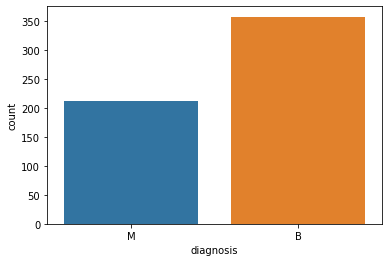

In [ ]:
sns.countplot(data=df,x=df["diagnosis"])

#Data Correlation: grouped by mean data with 12 features in this study that could be colsely correlated features with diagnosis 

In [ ]:
cor = df.corr()

In [ ]:
df.groupby('id')[['diagnosis','radius_mean','area_mean','perimeter_mean','texture_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']].mean()

,radius_mean,area_mean,perimeter_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
8670,15.46,748.9,101.70,19.48,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796
8913,12.89,515.9,81.89,13.12,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581
8915,14.96,687.3,97.03,19.10,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852
9047,12.94,507.6,83.18,16.17,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200
85715,13.17,534.6,85.98,18.66,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777
...,...,...,...,...,...,...,...,...,...,...
911157302,21.10,1384.0,138.10,20.52,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661
911296201,17.08,930.9,111.20,27.15,0.09898,0.11100,0.10070,0.06431,0.1793,0.06281
911296202,27.42,2501.0,186.90,26.27,0.10840,0.19880,0.36350,0.16890,0.2061,0.05623


In [ ]:
df = df[['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]

# Visualization: Data Correlation between features

In [ ]:
cor = df.corr()

In [ ]:
df.iloc[:,1:12].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


In [ ]:
df.groupby('id')[['diagnosis','radius_mean','area_mean','perimeter_mean','texture_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']].mean()
df.head(25)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,NaN


BarPlot: Showing correlation between radius,perimeter, and area means to show tumor diagnosis showing the toal differences between the 3 ranges

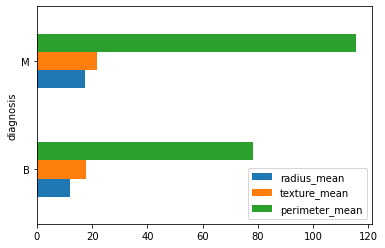

In [ ]:
df.groupby(['diagnosis']).mean()[['radius_mean', 'texture_mean','perimeter_mean' ]].plot.barh()

#Diagnosis 
for 
1. Mean 
2. Worst 
3. Se

In [ ]:
df.groupby('diagnosis')[['radius_mean','area_mean','perimeter_mean','texture_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']].mean()

,radius_mean,area_mean,perimeter_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
B,12.146524,462.790196,78.075406,17.914762,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
M,17.462830,978.376415,115.365377,21.604906,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680


In [ ]:
df.groupby('diagnosis')[['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']].mean()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,
B,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [ ]:
df.groupby('diagnosis')[['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se']].mean()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
diagnosis,,,,,,,,,,
B,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636
M,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062


#Heatmap Visualization 
Showing which variables correlate with each other

In [ ]:
df['diagnosis'].replace(to_replace='M', value = 1, inplace=True)
df['diagnosis'].replace(to_replace='B', value = 0, inplace=True)

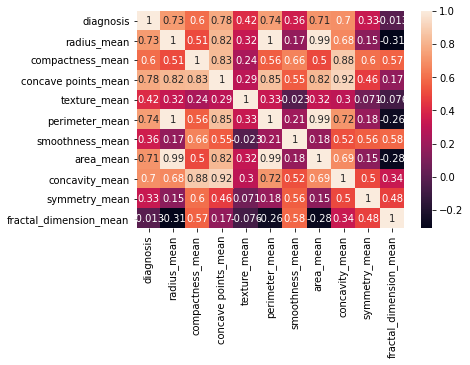

In [ ]:
sns.heatmap(df[['diagnosis','radius_mean','compactness_mean','concave points_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean','area_mean','concavity_mean','symmetry_mean','fractal_dimension_mean']].corr(), annot=True)

#Pairplot Visualizations

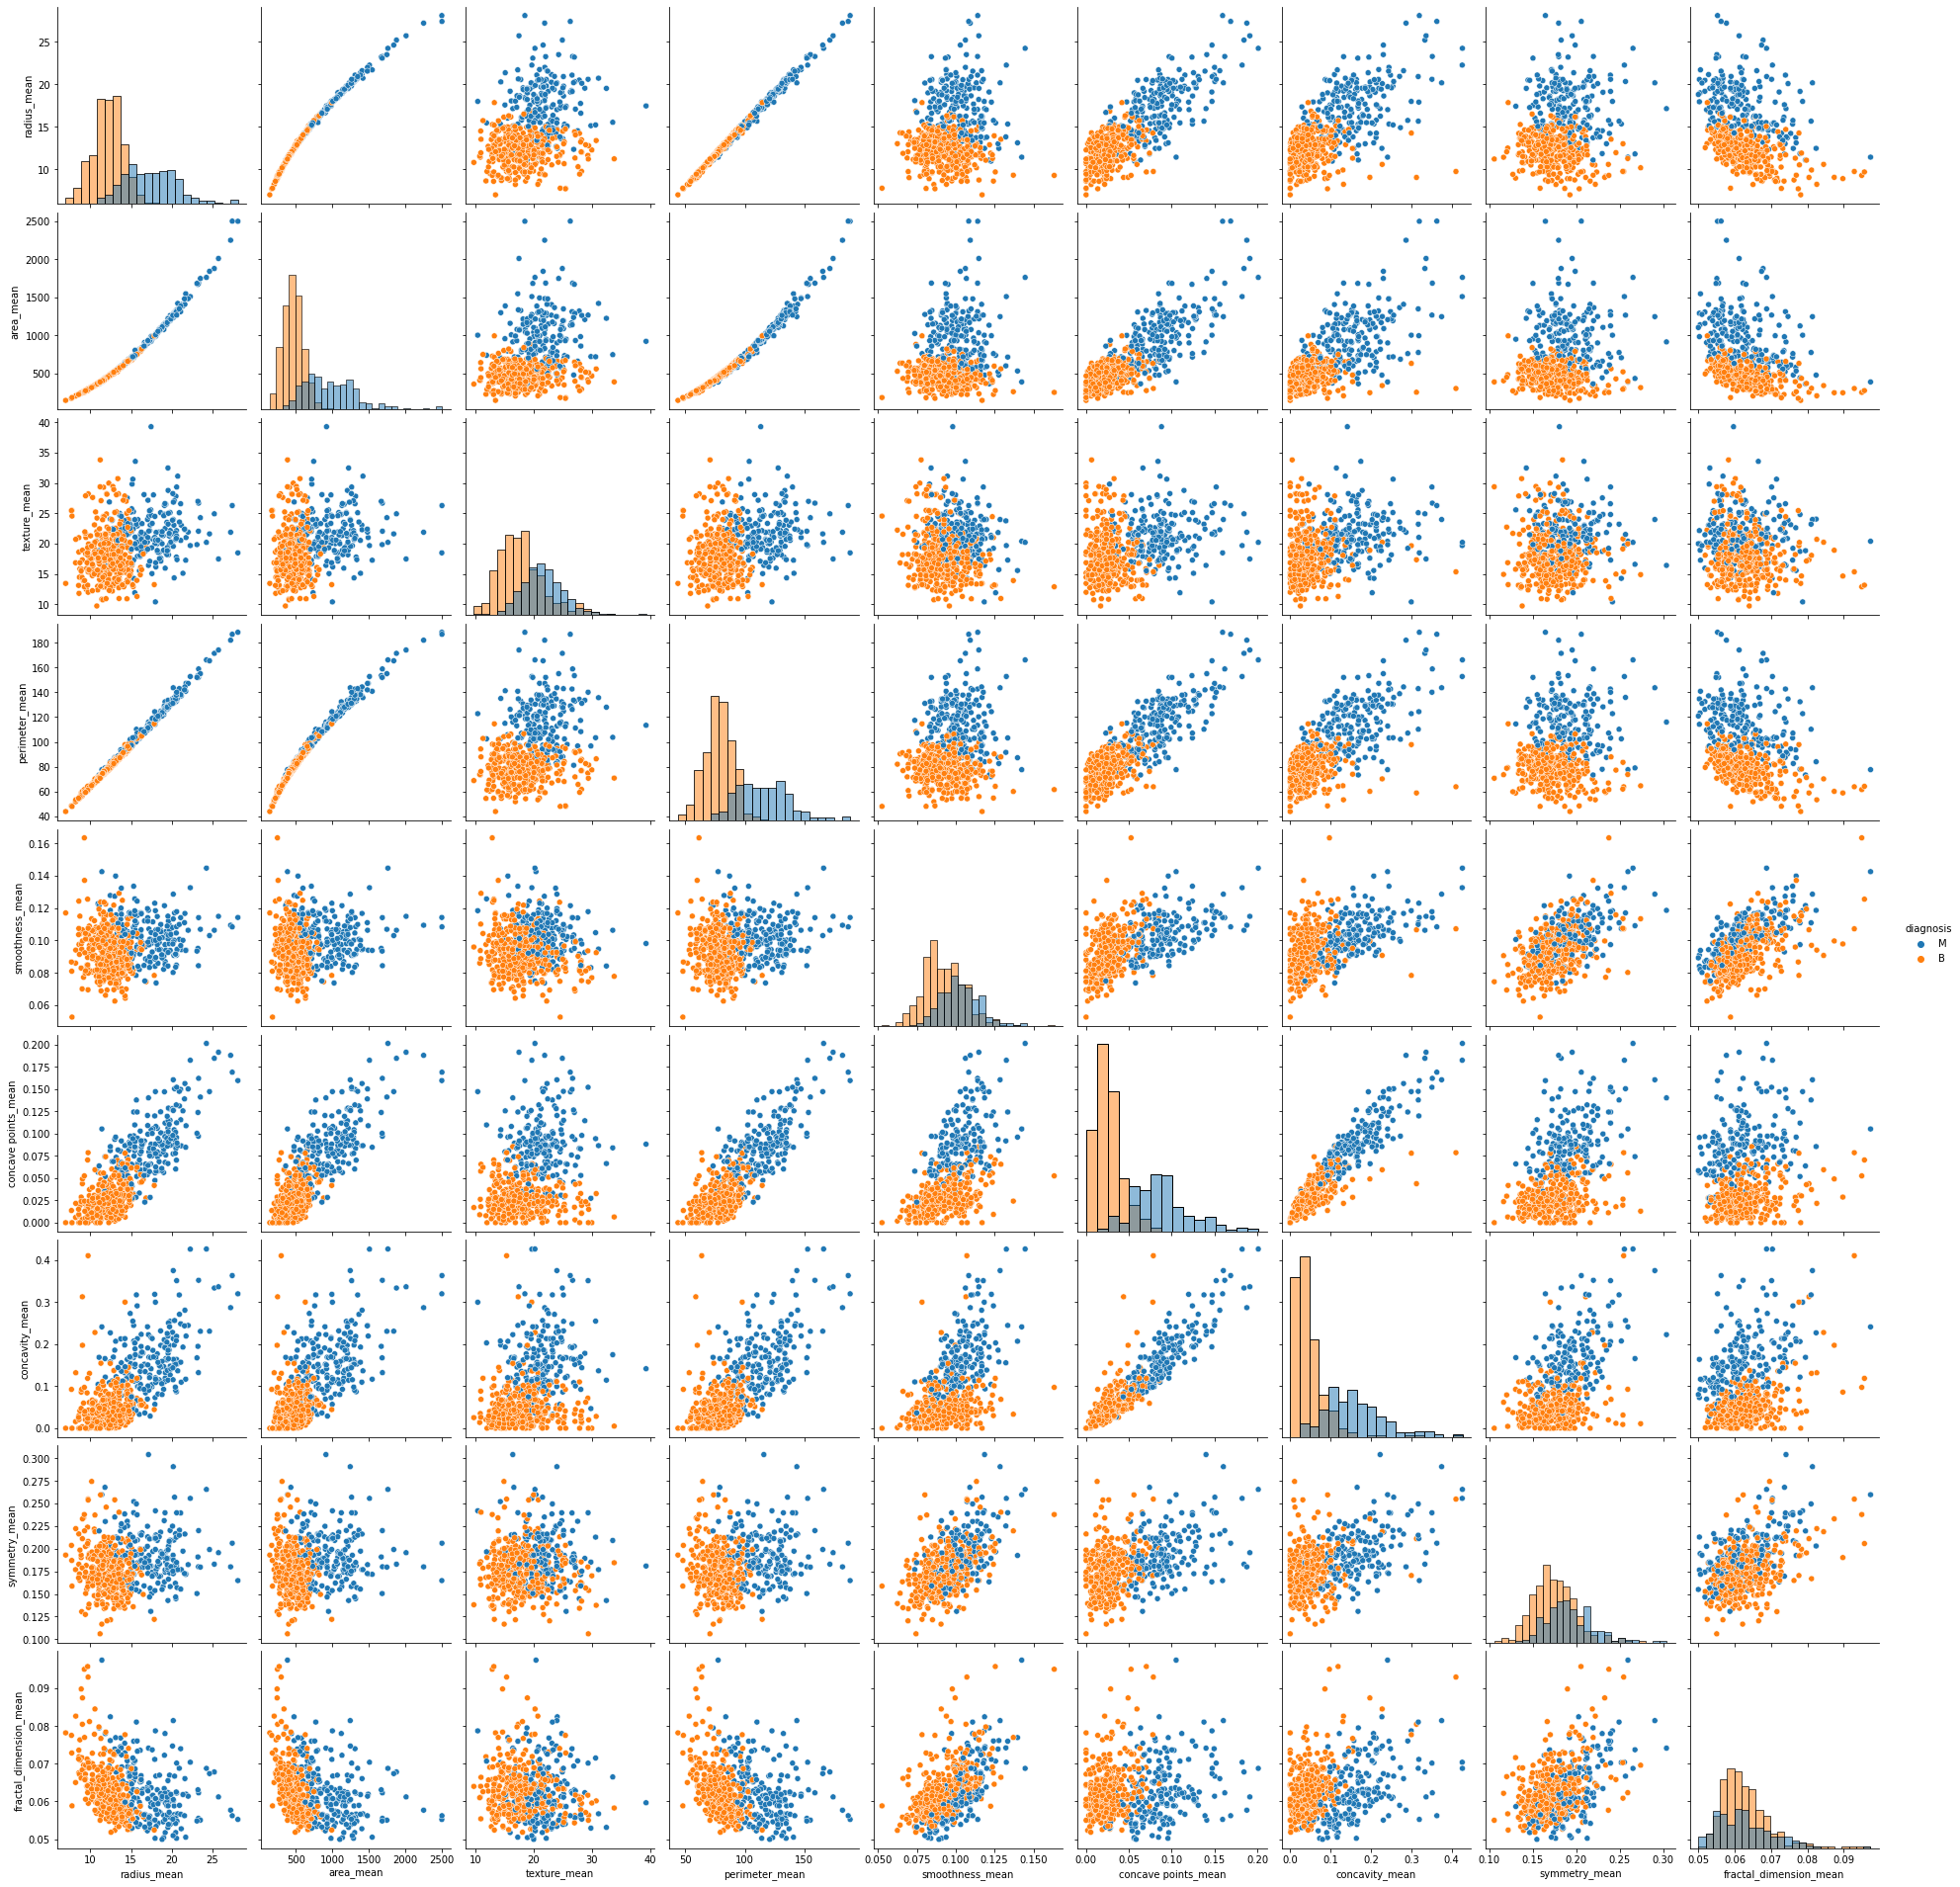

In [ ]:
sns.pairplot(data=df[['diagnosis','radius_mean','area_mean','texture_mean','perimeter_mean','smoothness_mean','concave points_mean','concavity_mean','symmetry_mean','fractal_dimension_mean']], hue="diagnosis", height=3, diag_kind="hist")
plt.show()

In [ ]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


#Visualization: Box Plot to show correlation between the benign and malignant groups for each feature
radius_mean, perimeter_mean, and area_mean features are co-related. We can take any of these features for cancer classification.


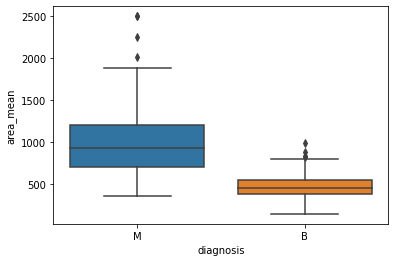

In [ ]:
sns.boxplot(x='diagnosis', y='area_mean', data=df),
showfliers= False
plt.savefig('seaborn_basic_area_mean_diagnosis.png')

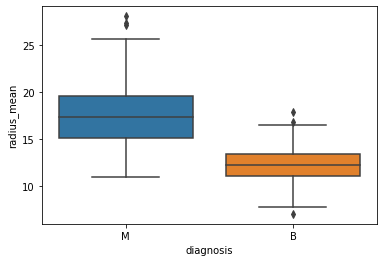

In [ ]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df),
showfliers= False
plt.savefig('seaborn_basic_radius_mean_diagnosis.png')

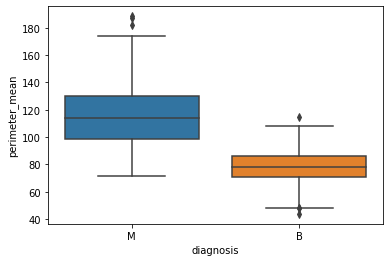

In [ ]:
sns.boxplot(x='diagnosis', y='perimeter_mean', data=df),
showfliers= False
plt.savefig('seaborn_basic_perimeter_mean_diagnosis.png')

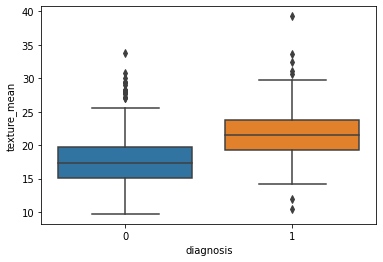

In [ ]:
sns.boxplot(x='diagnosis', y='texture_mean', data=df),
showfliers= False
plt.savefig('seaborn_basic_perimeter_mean_diagnosis.png')

#Following visualizations the radius mean, area mean and perimeter mean of Malignant and Benign tumors have been plotted in a histogram to analyze the most frequently appearing value, and to compare values between Malignant and Benign tumors.

#Histogram for radius mean values

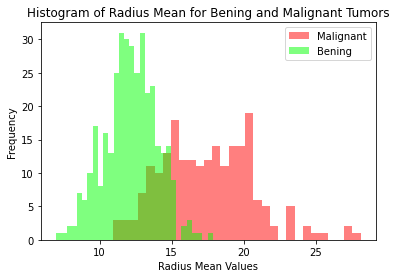

In [ ]:
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

#Frequent Radius Mean for 'M' and 'B'
M= Malignant
B= Benign 

In [ ]:
frequent_m_radius_mean = m[0].max()
index_frequent_m_radius_mean = list(m[0]).index(frequent_m_radius_mean)
most_frequent_m_radius_mean = m[1][index_frequent_m_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_m_radius_mean)

Most frequent malignant radius mean is:  20.101999999999997


In [ ]:
frequent_b_radius_mean = b[0].max()
index_frequent_b_radius_mean = list(b[0]).index(frequent_b_radius_mean)
most_frequent_b_radius_mean = b[1][index_frequent_b_radius_mean]
print("Most frequent bening radius mean is: ",most_frequent_b_radius_mean)

Most frequent bening radius mean is:  11.328600000000002


#Histogram for perimeter mean values 

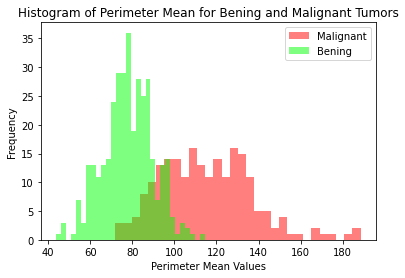

In [ ]:
m = plt.hist(df[df["diagnosis"] == "M"].perimeter_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].perimeter_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Perimeter Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Perimeter Mean for Bening and Malignant Tumors")
plt.show()

Frequent perimeter mean for 'M' 'and B'

In [ ]:
frequent_m_perimeter_mean = m[0].max()
index_frequent_m_perimeter_mean = list(m[0]).index(frequent_m_perimeter_mean)
most_frequent_m_perimeter_mean = m[1][index_frequent_m_perimeter_mean]
print("Most frequent Malignant perimeter mean is: ",most_frequent_m_perimeter_mean)

Most frequent Malignant perimeter mean is:  106.88


In [ ]:
frequent_b_perimeter_mean = b[0].max()
index_frequent_b_perimeter_mean = list(b[0]).index(frequent_b_perimeter_mean)
most_frequent_b_perimeter_mean = b[1][index_frequent_b_perimeter_mean]
print("Most frequent Benign perimeter mean is: ",most_frequent_b_perimeter_mean)

Most frequent Benign perimeter mean is:  76.83466666666666


# Histogram for Area Mean Values 

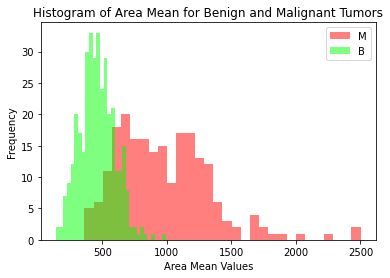

In [ ]:
m = plt.hist(df[df["diagnosis"] == "M"].area_mean,bins=30,fc = (1,0,0,0.5),label = "M")
b = plt.hist(df[df["diagnosis"] == "B"].area_mean,bins=30,fc = (0,1,0,0.5),label = "B")
plt.legend()
plt.xlabel("Area Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Area Mean for Benign and Malignant Tumors")
plt.show()

#Frequent Area Mean for 'M' and 'B'

In [ ]:
frequent_m_area_mean = m[0].max()
index_frequent_m_area_mean = list(m[0]).index(frequent_m_area_mean)
most_frequent_m_area_mean = m[1][index_frequent_m_area_mean]
print("Most frequent Malignant area mean is: ",most_frequent_m_area_mean)

Most frequent Malignant area mean is:  646.8533333333334


In [ ]:
frequent_b_area_mean = b[0].max()
index_frequent_b_area_mean = list(b[0]).index(frequent_b_area_mean)
most_frequent_b_area_mean = b[1][index_frequent_b_area_mean]
print("Most frequent Benign area mean is: ",most_frequent_b_area_mean)

Most frequent Benign area mean is:  398.08000000000004


In [ ]:
df.skew()

id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#Contour Plot 

In [ ]:
df['diagnosis'].replace(to_replace='M', value = 1, inplace=True)
df['diagnosis'].replace(to_replace='B', value = 0, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



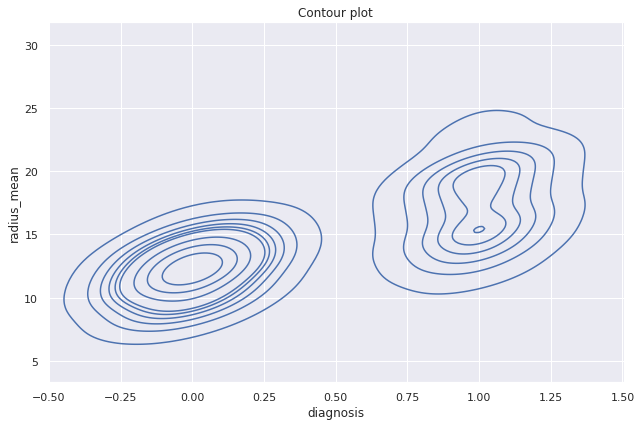

In [ ]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])
sns.kdeplot(df['diagnosis'], df['radius_mean'], ax = ax)
ax.set_title('Contour plot')
fig.savefig('contourplot.png', bbox_inches = 'tight')

#3D Visualizations

# 3D
# Concavity Perimeter and Area Mean 


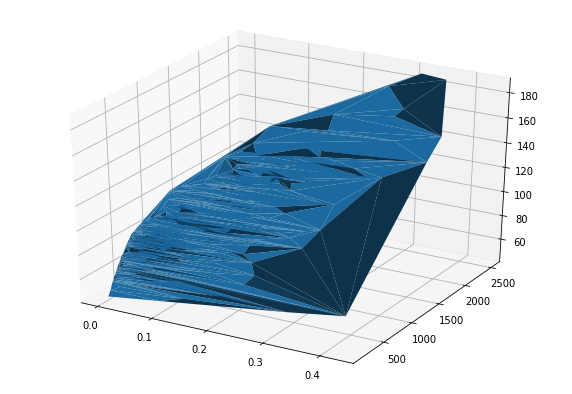

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize = (10, 7)) 
axes = fig.gca(projection ='3d') 
axes.plot_trisurf(df['concavity_mean'], df['area_mean'], df['perimeter_mean']) 
fig.savefig('surfaceplot.png', bbox_inches = 'tight')


#3D
#Smoothness Perimeter and Area mean

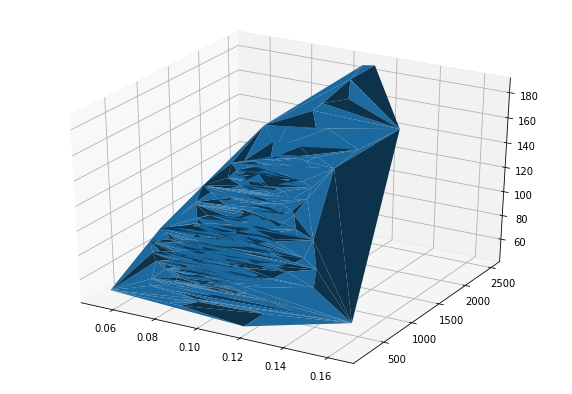

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize = (10, 7)) 
axes = fig.gca(projection ='3d') 
axes.plot_trisurf(df['smoothness_mean'], df['area_mean'], df['perimeter_mean']) 
fig.savefig('surfaceplot.png', bbox_inches = 'tight')

#SurfacePlot for Radius Area and Perimeter Mean
 that correlate directly with each other and tumor diagnosis 

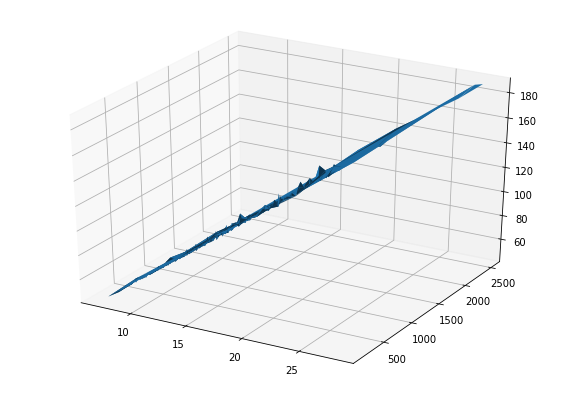

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize = (10, 7)) 
axes = fig.gca(projection ='3d') 
axes.plot_trisurf(df['radius_mean'], df['area_mean'], df['perimeter_mean']) 
fig.savefig('surfaceplot.png', bbox_inches = 'tight')

#3D ScatterPlot

In [ ]:
import plotly.express as px

In [ ]:
fig= px.scatter_3d(df, x='diagnosis', y='radius_mean', z='area_mean',
                   color='diagnosis')
fig.show()